## Predicting the drug for a patient using classification models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
print(data['Sex'].unique())
print(data['BP'].unique())
print(data['Cholesterol'].unique())
print(data['Drug'].unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


### Encoding

In [5]:
data_onehot = pd.get_dummies(data=data, columns = ['Sex','BP','Cholesterol'])

In [6]:
data_onehot.head()

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,DrugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,DrugY,1,0,0,1,0,1,0


### Splitting data into features and target

In [7]:
X = data_onehot.drop(['Drug'], axis=1)
y = data_onehot['Drug']

### Scaling (Without scaling age feature)

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X['Na_to_K'] = sc.fit_transform(X[['Na_to_K']])

In [9]:
X.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,0.596848,1,0,1,0,0,1,0
1,47,0.213397,0,1,0,1,0,1,0
2,47,0.120239,0,1,0,1,0,1,0
3,28,0.047814,1,0,0,0,1,1,0
4,61,0.368191,1,0,0,1,0,1,0


### Splitting data into testing and training

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=4)

#### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

model_lr.fit(x_train, y_train)

LogisticRegression()

In [12]:
y_pred = model_lr.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Accuracy score:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy score: 0.775
Confusion Matrix:
 [[14  0  1  0  0]
 [ 1  5  0  0  0]
 [ 2  0  1  0  0]
 [ 2  0  0  3  0]
 [ 3  0  0  0  8]]


#### KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier as knn

acc_val=[]
neighbors=np.arange(1,15)
for k in neighbors:
    classifier=knn(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

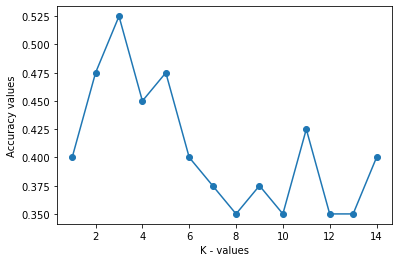

In [15]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show() 

In [16]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski')

model_knn.fit(x_train,y_train)
y_pred = model_knn.predict(x_test)

In [17]:
print('Accuracy score:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy score: 0.525
Confusion Matrix:
 [[12  1  1  0  1]
 [ 4  1  0  0  1]
 [ 2  0  1  0  0]
 [ 2  0  0  2  1]
 [ 6  0  0  0  5]]


#### SVM

In [18]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear', C=1, gamma='auto')
model_svc.fit(x_train,y_train)

y_pred = model_svc.predict(x_test)

In [19]:
print('Accuracy score:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy score: 0.775
Confusion Matrix:
 [[13  0  2  0  0]
 [ 3  3  0  0  0]
 [ 1  0  2  0  0]
 [ 2  0  0  3  0]
 [ 1  0  0  0 10]]


#### Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB  
model_nb = GaussianNB()  
model_nb.fit(x_train, y_train)  

y_pred = model_nb.predict(x_test)  

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Accuracy score:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy score: 0.775
Confusion Matrix:
 [[ 7  3  2  0  3]
 [ 0  6  0  0  0]
 [ 0  1  2  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]


### Scaling (Scaling age feature)

In [22]:
X = data_onehot.drop(['Drug'], axis=1)
y = data_onehot['Drug']

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X[['Age','Na_to_K']] = sc.fit_transform(X[['Age','Na_to_K']])

In [24]:
X.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,0.135593,0.596848,1,0,1,0,0,1,0
1,0.542373,0.213397,0,1,0,1,0,1,0
2,0.542373,0.120239,0,1,0,1,0,1,0
3,0.220339,0.047814,1,0,0,0,1,1,0
4,0.779661,0.368191,1,0,0,1,0,1,0


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=4)

#### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

model_lr.fit(x_train, y_train)

y_pred = model_lr.predict(x_test)

In [27]:
print('Accuracy score:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy score: 0.825
Confusion Matrix:
 [[15  0  0  0  0]
 [ 2  4  0  0  0]
 [ 2  0  1  0  0]
 [ 0  0  0  5  0]
 [ 3  0  0  0  8]]


#### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier as knn

acc_val=[]
neighbors=np.arange(1,15)
for k in neighbors:
    classifier=knn(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

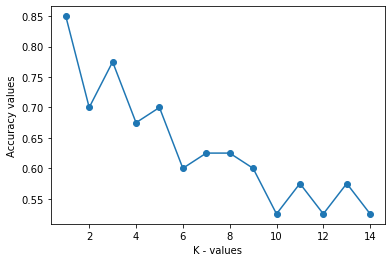

In [29]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show() 

In [30]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski')

model_knn.fit(x_train,y_train)
y_pred = model_knn.predict(x_test)

In [31]:
print('Accuracy score:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy score: 0.775
Confusion Matrix:
 [[10  0  1  0  4]
 [ 2  4  0  0  0]
 [ 0  1  2  0  0]
 [ 1  0  0  4  0]
 [ 0  0  0  0 11]]


#### SVM

In [32]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear', C=1, gamma='auto')
model_svc.fit(x_train,y_train)

y_pred = model_svc.predict(x_test)

In [33]:
print('Accuracy score:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy score: 0.775
Confusion Matrix:
 [[14  0  1  0  0]
 [ 4  2  0  0  0]
 [ 1  0  2  0  0]
 [ 2  0  0  3  0]
 [ 1  0  0  0 10]]


#### Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB  
model_nb = GaussianNB()  
model_nb.fit(x_train, y_train)  

y_pred = model_nb.predict(x_test)  

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Accuracy score:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy score: 0.7
Confusion Matrix:
 [[ 4  4  2  0  5]
 [ 0  6  0  0  0]
 [ 0  1  2  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
